<a href="https://colab.research.google.com/github/anmol1810rs/The_Sparks_Foundation_Internship/blob/main/Reliance_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRIP_TASK7_STOCK_PREDICTION_&_SENTIMENT_ANALYSIS**
  
  **Author: Anmol Malhotra**

# **PROBLEM STATEMENT:**

**Create a hybrid model for stock price/performance
prediction using numerical analysis of historical stock prices, and
sentimental analysis of news headlines**

In [ ]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Importing hte dataset
dataset = pd.read_csv(r'/content/Reliance_Data',index_col="Date", parse_dates=True)

In [ ]:
dataset.head(20)

,Open,High,Low,Close,Volume,Chg%
Date,,,,,,
2020-11-12,"1,984.90","2,007.35","1,970.05","1,987.35",12.35M,-0.49%
2020-11-11,"2,089.00","2,095.00","1,978.10","1,997.20",26.18M,-4.19%
2020-11-10,"2,077.00","2,090.00","2,041.20","2,084.55",17.05M,1.65%
2020-11-09,"2,062.10","2,069.00","2,036.00","2,050.70",16.54M,1.06%
2020-11-06,"1,990.00","2,040.00","1,978.15","2,029.15",30.77M,3.79%
2020-11-05,"1,954.95","1,960.95","1,932.00","1,955.00",17.17M,2.18%
2020-11-04,"1,837.00","1,929.00","1,837.00","1,913.20",37.00M,3.39%
2020-11-03,"1,890.00","1,909.00","1,835.10","1,850.40",40.93M,-1.44%
2020-11-02,"2,027.00","2,027.00","1,859.15","1,877.45",45.86M,-8.62%


In [ ]:
# Analyzing if any NULL values are present or not 
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
Chg%      False
dtype: bool

In [ ]:
# Analyzing the data types of all the attributes present
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1980 entries, 2020-11-12 to 2012-11-12
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Open    1980 non-null   object
 1   High    1980 non-null   object
 2   Low     1980 non-null   object
 3   Close   1980 non-null   object
 4   Volume  1980 non-null   object
 5   Chg%    1980 non-null   object
dtypes: object(6)
memory usage: 108.3+ KB


In [ ]:
# Since the change% is an irrelevant column we drop that 
dataset.drop(columns=['Chg%'], inplace =True)

In [ ]:
dataset.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2020-11-12,"1,984.90","2,007.35","1,970.05","1,987.35",12.35M
2020-11-11,"2,089.00","2,095.00","1,978.10","1,997.20",26.18M
2020-11-10,"2,077.00","2,090.00","2,041.20","2,084.55",17.05M
2020-11-09,"2,062.10","2,069.00","2,036.00","2,050.70",16.54M
2020-11-06,"1,990.00","2,040.00","1,978.15","2,029.15",30.77M
2020-11-05,"1,954.95","1,960.95","1,932.00","1,955.00",17.17M
2020-11-04,"1,837.00","1,929.00","1,837.00","1,913.20",37.00M
2020-11-03,"1,890.00","1,909.00","1,835.10","1,850.40",40.93M
2020-11-02,"2,027.00","2,027.00","1,859.15","1,877.45",45.86M


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1980 entries, 2020-11-12 to 2012-11-12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1980 non-null   float64
 1   High    1980 non-null   float64
 2   Low     1980 non-null   float64
 3   Close   1980 non-null   float64
 4   Volume  1980 non-null   object 
dtypes: float64(4), object(1)
memory usage: 92.8+ KB


In [ ]:
# Converting the numeric columns to numeric for easier access
dataset['Open'] = pd.to_numeric(dataset['Open'])
dataset['Close'] = pd.to_numeric(dataset['Close'])
dataset['High'] = pd.to_numeric(dataset['High'])
dataset['Low'] = pd.to_numeric(dataset['Low'])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1980 entries, 2020-11-12 to 2012-11-12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1980 non-null   float64
 1   High    1980 non-null   float64
 2   Low     1980 non-null   float64
 3   Close   1980 non-null   float64
 4   Volume  1980 non-null   object 
dtypes: float64(4), object(1)
memory usage: 92.8+ KB


In [ ]:
# Stripping the irrelevant string characters to make data more meaningful
dataset['Volume(in Millions)'] = dataset['Volume(in Millions)'].map(lambda x: x.rstrip('MkK'))

In [ ]:
dataset.head(10)

,Open,High,Low,Close,Volume(in Millions)
Date,,,,,
2020-11-12,1984.90,2007.35,1970.05,1987.35,12.35
2020-11-11,2089.00,2095.00,1978.10,1997.20,26.18
2020-11-10,2077.00,2090.00,2041.20,2084.55,17.05
2020-11-09,2062.10,2069.00,2036.00,2050.70,16.54
2020-11-06,1990.00,2040.00,1978.15,2029.15,30.77
2020-11-05,1954.95,1960.95,1932.00,1955.00,17.17
2020-11-04,1837.00,1929.00,1837.00,1913.20,37.00
2020-11-03,1890.00,1909.00,1835.10,1850.40,40.93
2020-11-02,2027.00,2027.00,1859.15,1877.45,45.86


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1980 entries, 2020-11-12 to 2012-11-12
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Open                 1980 non-null   float64
 1   High                 1980 non-null   float64
 2   Low                  1980 non-null   float64
 3   Close                1980 non-null   float64
 4   Volume(in Millions)  1980 non-null   object 
dtypes: float64(4), object(1)
memory usage: 92.8+ KB


In [ ]:
dataset['Volume(in Millions)'] = pd.to_numeric(dataset['Volume(in Millions)'])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1980 entries, 2020-11-12 to 2012-11-12
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Open                 1980 non-null   float64
 1   High                 1980 non-null   float64
 2   Low                  1980 non-null   float64
 3   Close                1980 non-null   float64
 4   Volume(in Millions)  1980 non-null   float64
dtypes: float64(5)
memory usage: 92.8 KB


In [ ]:
dataset.head(10)

,Open,High,Low,Close,Volume(in Millions)
Date,,,,,
2020-11-12,1984.90,2007.35,1970.05,1987.35,12.35
2020-11-11,2089.00,2095.00,1978.10,1997.20,26.18
2020-11-10,2077.00,2090.00,2041.20,2084.55,17.05
2020-11-09,2062.10,2069.00,2036.00,2050.70,16.54
2020-11-06,1990.00,2040.00,1978.15,2029.15,30.77
2020-11-05,1954.95,1960.95,1932.00,1955.00,17.17
2020-11-04,1837.00,1929.00,1837.00,1913.20,37.00
2020-11-03,1890.00,1909.00,1835.10,1850.40,40.93
2020-11-02,2027.00,2027.00,1859.15,1877.45,45.86


In [ ]:
# Sorting the data by means of Date
dataset_final = dataset.sort_values(by=['Date'], ascending=True)

In [ ]:
dataset_final.head(10)

,Open,High,Low,Close,Volume(in Millions)
Date,,,,,
2012-11-12,389.24,390.99,385.84,389.63,5.84
2012-11-13,390.87,392.38,388.02,391.09,1.55
2012-11-15,390.72,390.72,384.88,388.62,7.04
2012-11-16,390.00,392.60,381.88,383.94,6.63
2012-11-19,383.99,385.47,377.10,383.51,9.56
2012-11-20,386.68,386.68,377.52,379.08,4.35
2012-11-21,379.65,383.32,376.98,381.98,3.97
2012-11-22,382.90,383.22,377.13,379.33,4.84
2012-11-23,379.40,384.26,379.40,383.24,3.45


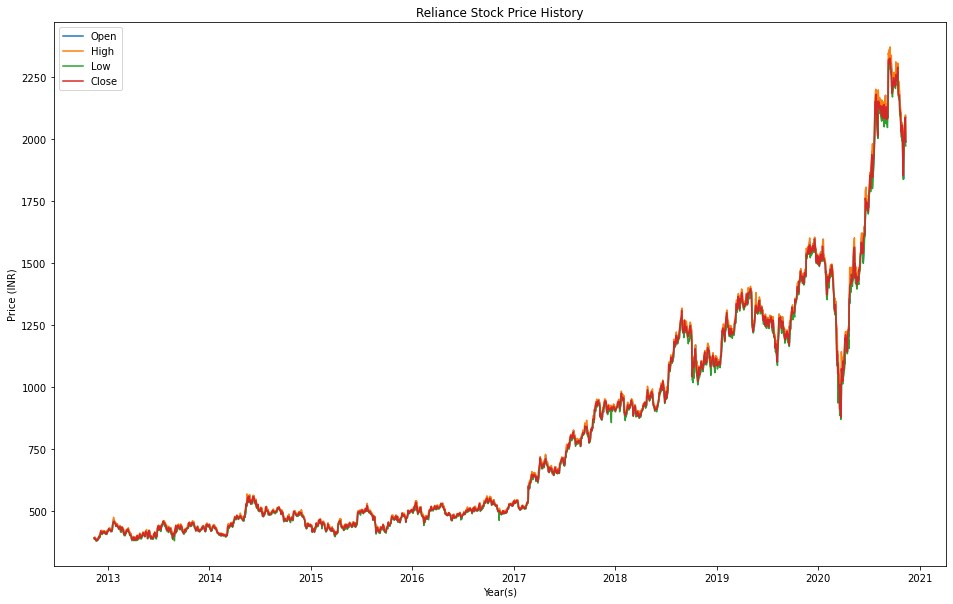

In [ ]:
# Visualizing the overall stock history of Reliance since the year 2012
plt.figure(figsize=(16,10))
plt.plot(dataset_final["Open"])
plt.plot(dataset_final["High"])
plt.plot(dataset_final["Low"])
plt.plot(dataset_final["Close"])
plt.title('Reliance Stock Price History')
plt.ylabel('Price (INR)')
plt.xlabel('Year(s)')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

In [ ]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1980 entries, 2012-11-12 to 2020-11-12
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Open                 1980 non-null   float64
 1   High                 1980 non-null   float64
 2   Low                  1980 non-null   float64
 3   Close                1980 non-null   float64
 4   Volume(in Millions)  1980 non-null   float64
dtypes: float64(5)
memory usage: 92.8 KB


In [ ]:
# Here we find the rolling average(mean) of the first 7 days and then use it to aplly it to the rest of the data
dataset_final.rolling(7).mean().head(10)

,Open,High,Low,Close,Volume(in Millions)
Date,,,,,
2012-11-12,NaN,NaN,NaN,NaN,NaN
2012-11-13,NaN,NaN,NaN,NaN,NaN
2012-11-15,NaN,NaN,NaN,NaN,NaN
2012-11-16,NaN,NaN,NaN,NaN,NaN
2012-11-19,NaN,NaN,NaN,NaN,NaN
2012-11-20,NaN,NaN,NaN,NaN,NaN
2012-11-21,387.307143,388.880000,381.745714,385.407143,5.562857
2012-11-22,386.401429,387.770000,380.501429,383.935714,5.420000
2012-11-23,384.762857,386.610000,379.270000,382.814286,5.691429


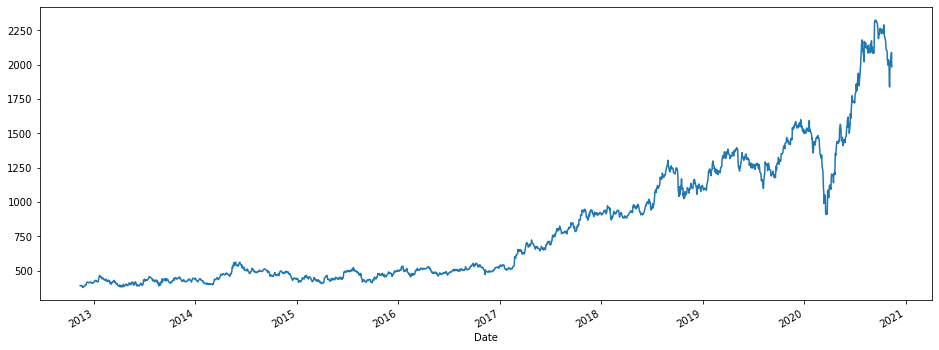

In [ ]:
# Visualzing the new dataset after initializing the rolling mean in each case
dataset_final['Open'].plot(figsize=(16,6))

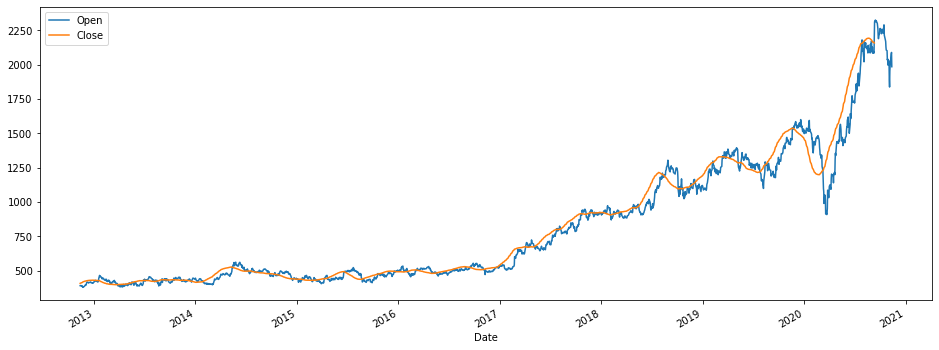

In [ ]:
# Visualizing the stock in terms of opening and closing stock price and simulataneously comparing them 
dataset_final['Open'].plot(figsize=(16,6))
dataset.rolling(window =45).mean()['Close'].plot()
plt.legend(['Open', 'Close'], loc='upper left')

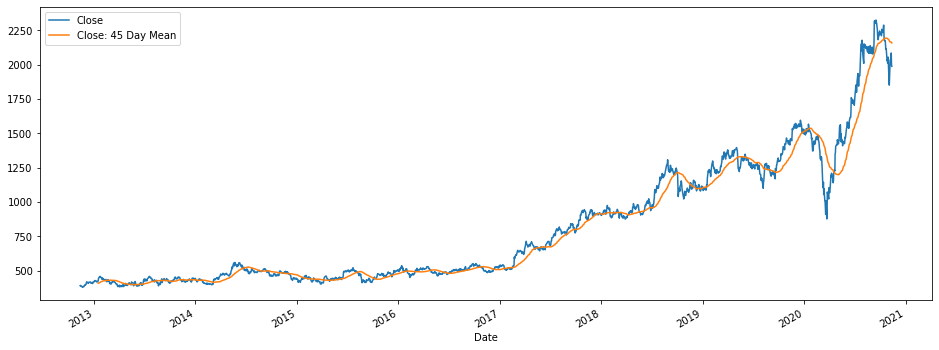

In [ ]:
# We then find out the 45 day mean( 1 observation recorded fr 45 days and plotting) which will later be used to make our data smoother
dataset_final['Close: 45 Day Mean'] = dataset_final['Close'].rolling(window=45).mean()
dataset_final[['Close', 'Close: 45 Day Mean']].plot(figsize=(16,6))

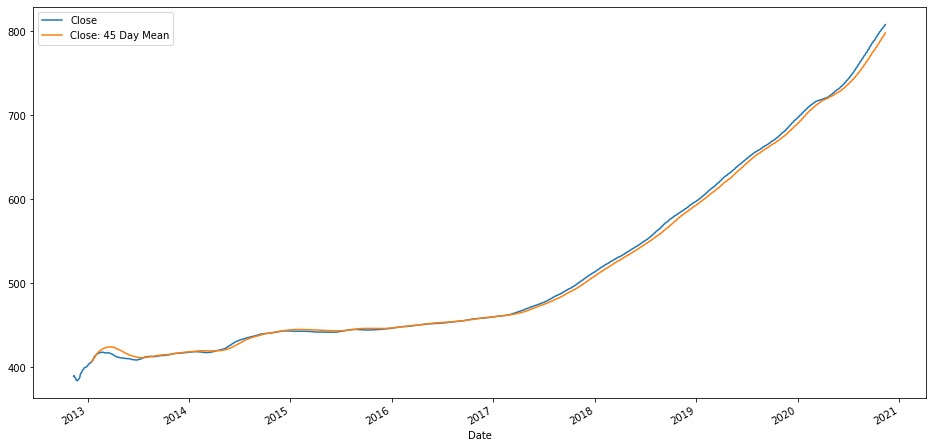

In [ ]:
#If we consider the 45 day window  and only one observation(min_periods=1) is considered in that period, the graph seems more smooth
dataset_final[['Close','Close: 45 Day Mean']].expanding(min_periods=1,).mean().plot(figsize=(16,8))

In [ ]:
train_data = dataset_final['Open']
train_data = pd.DataFrame(train_data)

In [ ]:
dataset_final.isna().any()

Open                   False
High                   False
Low                    False
Close                  False
Volume(in Millions)    False
Close: 45 Day Mean      True
dtype: bool

In [ ]:
#Applying feature Scaling using MinMaxSclaer
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
train_data_scaled = sc.fit_transform(train_data) 

In [ ]:
# It is an RNN and for this, we make use of timstamp functionality which ensures that the values collated are revalidated during back propagation and updated
#Creating a dataset with 50 timesteps and  1 expected ouput
X_train= []
y_train= []

for i in range(50,1980):
  X_train.append(train_data_scaled[i-50:i, 0])
  y_train.append(train_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping the train data
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 1 ))


In [ ]:
#Building the Recuurent Neural network (RNN)

#Using keras library and importing the rrequired packages
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
# Initialising the RNN
regressor = Sequential()


In [ ]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))


In [ ]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
61/61 [==============================] - 6s 102ms/step - loss: 0.0016
Epoch 2/100
61/61 [==============================] - 7s 116ms/step - loss: 0.0014
Epoch 3/100
61/61 [==============================] - 6s 105ms/step - loss: 0.0013
Epoch 4/100
61/61 [==============================] - 6s 106ms/step - loss: 0.0012
Epoch 5/100
61/61 [==============================] - 6s 103ms/step - loss: 0.0014
Epoch 6/100
61/61 [==============================] - 6s 103ms/step - loss: 0.0015
Epoch 7/100
61/61 [==============================] - 6s 104ms/step - loss: 0.0014
Epoch 8/100
61/61 [==============================] - 6s 104ms/step - loss: 0.0012
Epoch 9/100
61/61 [==============================] - 6s 101ms/step - loss: 0.0012
Epoch 10/100
61/61 [==============================] - 6s 102ms/step - loss: 0.0011
Epoch 11/100
61/61 [==============================] - 6s 99ms/step - loss: 0.0012
Epoch 12/100
61/61 [==============================] - 6s 102ms/step - loss: 0.0012
Epoch 13/100
6

In [ ]:
#Making the predictions and visualising the results

# Getting the real stock prices
dataset_test = pd.read_csv(r'Reliance_TestSet_2.csv',index_col="Date",parse_dates=True)
dataset_test = dataset_test.sort_values(by=['Date'], ascending=True)


In [ ]:
# Printing the real stock prices 
real_stock_price = dataset_test.iloc[:, 3:4].values
print(real_stock_price)

[[2237.050049]
 [2280.699951]
 [2287.5     ]
 [2206.5     ]
 [2175.800049]
 [2176.199951]
 [2155.899902]
 [2124.600098]
 [2106.949951]
 [2113.050049]
 [2029.099976]
 [2034.5     ]
 [2011.449951]
 [2026.900024]
 [2054.5     ]
 [1877.449951]
 [1850.400024]
 [1913.199951]
 [1955.      ]
 [2029.150024]
 [2050.699951]
 [2084.550049]
 [1997.199951]]


In [ ]:
dataset_test.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2020-10-12,2235.000000,2255.750000,2226.250000,2237.050049,6565515
2020-10-13,2230.600098,2285.750000,2225.850098,2280.699951,10666190
2020-10-14,2278.899902,2304.000000,2268.500000,2287.500000,12341434
2020-10-15,2290.000000,2290.000000,2195.000000,2206.500000,9246702
2020-10-16,2215.000000,2232.500000,2172.649902,2175.800049,9960828
2020-10-19,2190.050049,2228.699951,2155.149902,2176.199951,14398973
2020-10-20,2179.000000,2193.000000,2152.250000,2155.899902,8529573
2020-10-21,2168.000000,2192.000000,2097.750000,2124.600098,15728986
2020-10-22,2127.399902,2132.500000,2091.000000,2106.949951,14215215


In [ ]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23 entries, 2020-10-12 to 2020-11-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    23 non-null     float64
 1   High    23 non-null     float64
 2   Low     23 non-null     float64
 3   Close   23 non-null     float64
 4   Volume  23 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 1.1 KB


In [ ]:
test_set=dataset_test['Close']
test_set=pd.DataFrame(test_set)

In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23 entries, 2020-10-12 to 2020-11-11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   23 non-null     float64
dtypes: float64(1)
memory usage: 368.0 bytes


In [ ]:
# Getting the predicted stock price of 2017(taken as preference year)
dataset_total = pd.concat((dataset['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 50:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(50, 73):
    X_test.append(inputs[i-50:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       23 non-null     float32
dtypes: float32(1)
memory usage: 220.0 bytes


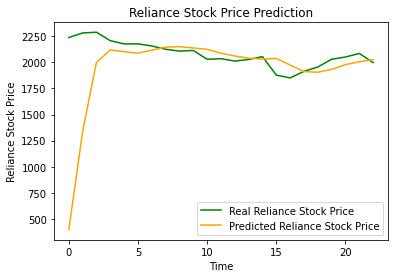

In [ ]:
# Visualising the results
plt.plot(real_stock_price, color = 'green', label = 'Real Reliance Stock Price')
plt.plot(predicted_stock_price, color = 'orange', label = 'Predicted Reliance Stock Price')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.legend()
plt.show()


## **We can observe that the graph of real and predicted stock price seem to start converging, as we process the data further, indicating that the rate of information accuracy is growing with each calculation and timestamp.**

In [5]:
# Importing the enecessary libraries
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [22]:
# Analyzing the sentiment and the data attatched to it
sentiment_data = pd.read_csv('/content/sentiment_data.tsv',sep='        ')
sentiment_data = sentiment_data.sample(frac=1).reset_index(drop=True)
print(sentiment_data.shape)
sentiment_data.head()

(958, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



,Text,Feeling
0,i feel kerry didnt do by supporting civil unio...,love
1,i feel when you are a caring person you attrac...,love
2,i wonder sometimes whether i have just added t...,fear
3,i always know when i am feeling artistic when ...,joy
4,i stopped feeling so exhausted a href http pro...,sadness


In [24]:
sentiment_data = sentiment_data[ ['Feeling', 'Text']]
sentiment_data.head()

,Feeling,Text
0,love,i feel kerry didnt do by supporting civil unio...
1,love,i feel when you are a caring person you attrac...
2,fear,i wonder sometimes whether i have just added t...
3,joy,i always know when i am feeling artistic when ...
4,sadness,i stopped feeling so exhausted a href http pro...


In [25]:
new_row = pd.DataFrame({'Feeling':'sadness','Text':'I am isolated, i need friends'}, 
                                                            index =[0]) 
# simply concatenate both dataframes 
sentiment_data = pd.concat([new_row, sentiment_data]).reset_index(drop = True) 
sentiment_data.head(5) 

,Feeling,Text
0,sadness,"I am isolated, i need friends"
1,love,i feel kerry didnt do by supporting civil unio...
2,love,i feel when you are a caring person you attrac...
3,fear,i wonder sometimes whether i have just added t...
4,joy,i always know when i am feeling artistic when ...


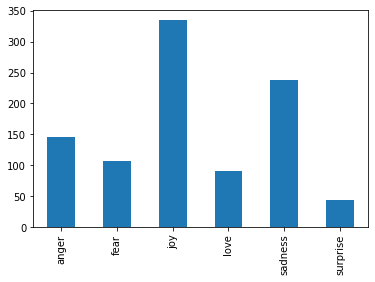

In [27]:
# analyzing the various emotions attatched to the headlines
sentiment_data['Feeling'].value_counts().sort_index().plot.bar()

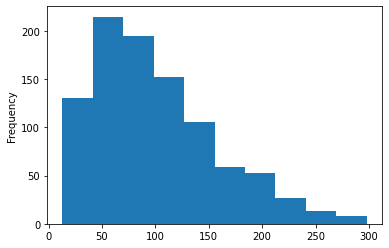

In [28]:
# Analyzing the length of the headlines in the dataset
sentiment_data['Text'].str.len().plot.hist()

In [29]:
# Arranging data in lowercase format to apply tokenization in the later stage 
sentiment_data['Text'].apply(lambda x: x.lower()) #transform text to lowercase
sentiment_data['Text'] = sentiment_data['Text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x))
sentiment_data['Text'].head()

0                         I am isolated i need friends
1    i feel kerry didnt do by supporting civil unio...
2    i feel when you are a caring person you attrac...
3    i wonder sometimes whether i have just added t...
4    i always know when i am feeling artistic when ...
Name: Text, dtype: object

In [30]:
# Applying tokenization of the data 
tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(sentiment_data['Text'].values)

X = tokenizer.texts_to_sequences(sentiment_data['Text'].values)
X = pad_sequences(X) # padding our text vector so they all have the same length
X[:6]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    1,   19,  396,    1,  102,  346],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    1,    2, 1285,
         112,   41,   46,  397,  853, 1286,    3, 1287, 1288],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0

In [31]:
# RNN activation model inilitialization
model = Sequential()
model.add(Embedding(5000, 256, input_length=X.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))

In [32]:
# Using the Adam Optimization Technique ( to handle problems and optimization of gradient descends)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 64, 256)           1280000   
_________________________________________________________________
dropout (Dropout)            (None, 64, 256)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 64, 256)           525312    
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense (Dense)                (None, 6)                 1542      
Total params: 2,332,166
Trainable params: 2,332,166
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Basically each sentiment is initialized with a matrix encoded value (can be assumed like a binary value for ease of understadning)
# We can observe that no, 2 same values have been assigned to different sentiments
y = pd.get_dummies(sentiment_data['Feeling']).values
[print(sentiment_data['Feeling'][i], y[i]) for i in range(0,8)]

sadness [0 0 0 0 1 0]
love [0 0 0 1 0 0]
love [0 0 0 1 0 0]
fear [0 1 0 0 0 0]
joy [0 0 1 0 0 0]
sadness [0 0 0 0 1 0]
joy [0 0 1 0 0 0]
anger [1 0 0 0 0 0]


[None, None, None, None, None, None, None, None]

In [37]:
# Training model with 80 percent  train data and use the rest 20 percent for testing accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
# Assigning optimum epochs and batch sizes for recomputational purposes
batch_size = 32
epochs = 8

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/8
24/24 - 32s - loss: 1.6716 - accuracy: 0.2816
Epoch 2/8
24/24 - 27s - loss: 1.6161 - accuracy: 0.3716
Epoch 3/8
24/24 - 27s - loss: 1.4690 - accuracy: 0.4342
Epoch 4/8
24/24 - 27s - loss: 1.0768 - accuracy: 0.5893
Epoch 5/8
24/24 - 27s - loss: 0.7030 - accuracy: 0.7392
Epoch 6/8
24/24 - 27s - loss: 0.4611 - accuracy: 0.8240
Epoch 7/8
24/24 - 27s - loss: 0.2672 - accuracy: 0.9061
Epoch 8/8
24/24 - 27s - loss: 0.1599 - accuracy: 0.9452


In [40]:
# Checking for predictions now after model computation 
predictions = model.predict(X_test)

[print(sentiment_data['Text'][i], predictions[i], y_test[i]) for i in range(0, 10)]

I am isolated i need friends [9.9881518e-01 7.4573129e-04 4.5991590e-05 6.3125277e-05 2.9237170e-04
 3.7681533e-05] [0 0 0 0 1 0]
i feel kerry didnt do by supporting civil unions and gay equality [0.7995061  0.17155531 0.00080142 0.00243061 0.01848041 0.00722603] [0 1 0 0 0 0]
i feel when you are a caring person you attract other caring people into your life [0.46043772 0.33337936 0.00532893 0.12269212 0.00169276 0.07646909] [0 0 0 1 0 0]
i wonder sometimes whether i have just added to the antagonism and misunderstanding that many people have towards those of us who feel reluctant to wholeheartedly support the traditional armistice day remembrances [4.9401736e-03 1.1339504e-03 9.4892371e-01 1.0621893e-02 3.3981770e-02
 3.9852655e-04] [0 0 1 0 0 0]
i always know when i am feeling artistic when i write my name while i am in an artistic mood the i in manitz i draw a circle not a dot the bigger the dot the more artistic i am feeling and if it is just a line like an accent mark in spanish i

[None, None, None, None, None, None, None, None, None, None]

**We can observe that for each prediciton , the value obtained can be compared with the initial value(the actual value) assigned and hence the accuracy for each headline can be easily determined.**

# **This brings us to the end of our Task.**